# **Spotify Dataset**

In [ ]:
'''
Name: Subash Gupta Karamsetty
Znumber: Z23689645
Assignment Number: 9
Professor: Dr. Ghoraani

This is my Colab file link:
https://colab.research.google.com/drive/1c6T3LTXTyhcJBfCSVcucVmsZIR6dEZBk
'''

# **Importing all the required modules**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn import preprocessing

# **Loading the dataset from google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
originaldataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/spotify_preprocessed.csv", header = 0)
originaldatasetfinal = originaldataset.drop("target", axis = 1)
originallabels = originaldataset.pop("target")

# **Splitting the dataset for testing, validation and training**

In [ ]:
indexes_random = np.arange(0,originaldatasetfinal.shape[0]) #creating a range array starting from 0 to training dataset images count.
random_indexes_final = np.random.permutation(indexes_random) #using the random function to randomize the images (using indexes).

originaldatasetfinal = originaldatasetfinal.values #converting pd to numpy format
originallabels = originallabels.values #converting pd to numpy format

randomdataset = originaldatasetfinal[random_indexes_final] #restructuring the new training dataset images with the randomized indexes.
randomlabels = originallabels[random_indexes_final]        #restructuring the new training dataset labels respectively with the randomized indexes.
print("After ramdomizing, the training samples shape is : ",randomdataset.shape,randomlabels.shape)

#We want 90% training and 10% testing
#for testing
sizes = int(randomdataset.shape[0]*0.1)
x_test = randomdataset[:sizes, : ] #considering the 10% samples as testing dataset (This includes random data since randamized already)
y_test = randomlabels[:sizes]
print("The first 10% samples cosnidered as testing set : ",x_test.shape, y_test.shape)
#for training
x_train = randomdataset[sizes: , : ] #considering the remaining 90% samples as the training dataset.
y_train = randomlabels[sizes: ]
print("The remaining will be the training set : ",x_train.shape, y_train.shape)

#Now splitting the training 90% training dataset into 20% validation and 80% training datasets
sizes1 = int(x_train.shape[0]*0.8)
x_val = x_train[sizes1: ,: ] #considering the remaining 20% samples as the validation dataset.
y_val = y_train[sizes1: ]
print("The 20% validation set is : ",x_val.shape, y_val.shape)

x_train = x_train[:sizes1,:] #considering the first 80% samples as the training dataset.
y_train = y_train[:sizes1]
print("The 80% training set is : ",x_train.shape, y_train.shape)

After ramdomizing, the training samples shape is :  (6398, 15) (6398,)
The first 10% samples cosnidered as testing set :  (639, 15) (639,)
The remaining will be the training set :  (5759, 15) (5759,)
The 20% validation set is :  (1152, 15) (1152,)
The 80% training set is :  (4607, 15) (4607,)


# **The plot_curves function which will plot the accuracy curve and the loss curve**

In [ ]:
def plot_curves(accuracys,losses,name = False): #the plot function which will plot the Accuracy for each epoch
    epochess = np.arange(losses.shape[0])
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    if name:
      plt.title('Testing Accuracy')
    else:
      plt.title('Training Accuracy')
    plt.plot(epochess, accuracys)
    plt.show()


    plt.subplot(1,2,2) #the plot which will plot the Loss for each epoch
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy Losses')
    if name:
      plt.title('Testing Loss')
    else:
      plt.title('Testing Loss')
    plt.plot(epochess, losses)
    plt.show()

# **Part 1: The Model with 2 layers with 32 nodes with each and 1 unit at the output**
I used tanh activation function for the 2 layers and sigmoid for the output layer as the activation function

In [ ]:
def models(units_val, x_train, y_train, x_val, y_val, batch, epoch, lr1, thirdlayer = False):
    #Step1:
    model = Sequential()
    input_shape = x_train.shape[1]
    model.add(Dense(input_dim = input_shape, units = units_val, activation='tanh'))
    model.add(Dense(units = units_val, activation='tanh'))
    if thirdlayer:
      model.add(Dense(units = units_val, activation='tanh'))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.summary()

    #Step2:
    optimize = SGD(learning_rate = lr1)
    model.compile(optimizer=optimize, loss='binary_crossentropy', metrics=['accuracy'])

    #Step3:
    history = model.fit(x_train, y_train, batch_size=batch, epochs=epoch, verbose = 0)
    print("-*-"*65)

    #Step4:
    train_scores = model.evaluate(x_train, y_train)
    print("Training Loss:", train_scores[0])
    print("Training Accuracy:", train_scores[1])
    print("-*-"*65)
    val_scores = model.evaluate(x_val, y_val)
    print("Validation Loss:", val_scores[0])
    print("Validation Accuracy:", val_scores[1])
    print("-*-"*65)

    plt.figure(figsize=[12,5])
    accuracy_curve = np.array(history.history['accuracy'])
    loss_curve = np.array(history.history['loss'])
    plot_curves(accuracy_curve, loss_curve)

# **Testing for the above case with the given conditions.**

Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_262 (Dense)           (None, 32)                512       
                                                                 
 dense_263 (Dense)           (None, 32)                1056      
                                                                 
 dense_264 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1601 (6.25 KB)
Trainable params: 1601 (6.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
144/144 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.8081


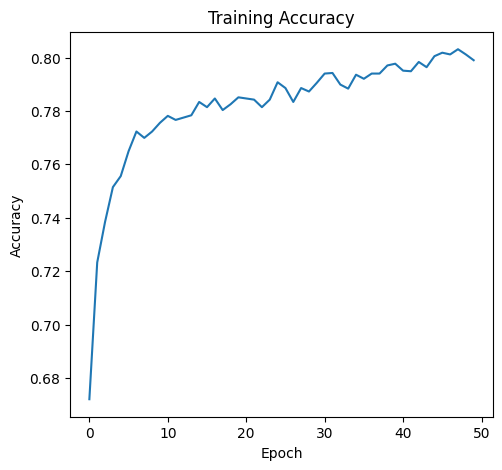

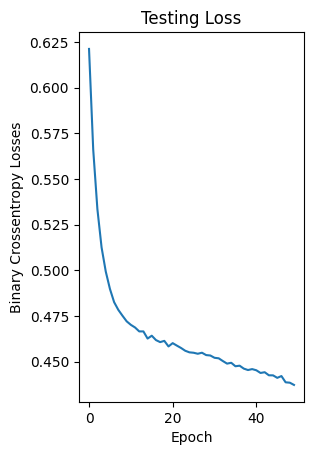

In [ ]:
units_val = [32]
lr1=[0.01]
epoch=[50]
batch=[16]
thirdlayer = [False]
for i in range(len(lr1)):
  models(units_val[i], x_train, y_train, x_val, y_val,batch[i], epoch[i], lr1[i], thirdlayer[i])

# **Model 2:**
I have created a new model with relu activation function for the 2 hidden layers and softmax for the output layer. Here in the output as I am using softmax so I have used the to_categorical function to convert the labels and use it in the model output layer.

In [ ]:
classes1 = [0, 1] #after mapping, we changed them to 0,1

y_train_c = to_categorical(y_train, len(classes1)) #converting them to categorical form
y_test_c = to_categorical(y_test, len(classes1))
y_val_c = to_categorical(y_val, len(classes1))

In [ ]:
def model2(units_val, x_train, y_train_c, x_val, y_val_c, batch, epoch, lr1, thirdlayer = False):
    #Step1:
    model = Sequential()
    input_shape = x_train.shape[1]
    model.add(Dense(input_dim = input_shape, units = units_val, activation='relu'))
    model.add(Dense(units = units_val, activation='relu'))
    if thirdlayer:
      model.add(Dense(units = units_val, activation='relu'))
    model.add(Dense(units = len(classes1), activation = 'softmax'))
    model.summary()

    #Step2:
    optimize = SGD(learning_rate = lr1)
    model.compile(optimizer=optimize, loss='binary_crossentropy', metrics=['accuracy'])

    #Step3:
    history = model.fit(x_train, y_train_c, batch_size=batch, epochs=epoch, verbose = 0)
    print("-*-"*65)

    #Step4:
    train_scores = model.evaluate(x_train, y_train_c)
    print("Training Loss:", train_scores[0])
    print("Training Accuracy:", train_scores[1])
    print("-*-"*65)
    val_scores = model.evaluate(x_val, y_val_c)
    print("Validation Loss:", val_scores[0])
    print("Validation Accuracy:", val_scores[1])
    print("-*-"*65)

    plt.figure(figsize=[12,5])
    accuracy_curve = np.array(history.history['accuracy'])
    loss_curve = np.array(history.history['loss'])
    plot_curves(accuracy_curve, loss_curve)

Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_290 (Dense)           (None, 32)                512       
                                                                 
 dense_291 (Dense)           (None, 32)                1056      
                                                                 
 dense_292 (Dense)           (None, 2)                 66        
                                                                 
Total params: 1634 (6.38 KB)
Trainable params: 1634 (6.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
144/144 [==============================] - 0s 1ms/step - loss: 0.4149 - accuracy: 0.8096


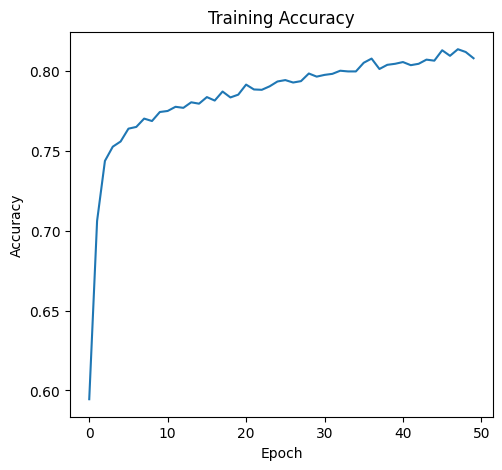

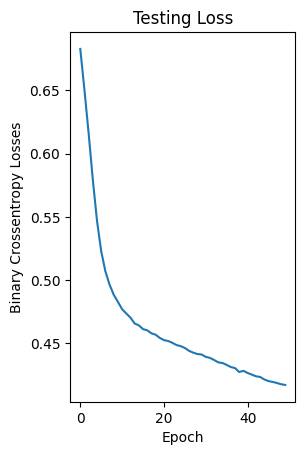

In [ ]:
units_val = [32]
lr1=[0.01]
epoch=[50]
batch=[16]
thirdlayer = [False]
for i in range(len(lr1)):
  model2(units_val[i], x_train, y_train_c, x_val, y_val_c,batch[i], epoch[i], lr1[i], thirdlayer[i])

#The use of Relu and Softmax did not give me any major differences in the accuracy values when compared with the tanh and sigmoid activation functions. Hence, I considered the model with only tanh and sigmoid for testing with different cases. Here I modified the epochs, batches, number of layers, learning rates, and unit values to test and find the best model.

# **Part 2: Trying different ideas for the model to test the training and validation datasets. Finding out which combination is best by selecting different combinations of parameters and finding the loss and accuracy for training and validation datasets**

The selected Units are 64
The selected Learning Rate is 0.01
The selected Epoch value is 50
The selected Batch Value are 16
2 layers are considered with the same units and same activation function
Model: "sequential_108"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_327 (Dense)           (None, 64)                1024      
                                                                 
 dense_328 (Dense)           (None, 64)                4160      
                                                                 
 dense_329 (Dense)           (None, 1)                 65        
                                                                 
Total params: 5249 (20.50 KB)
Trainable params: 5249 (20.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

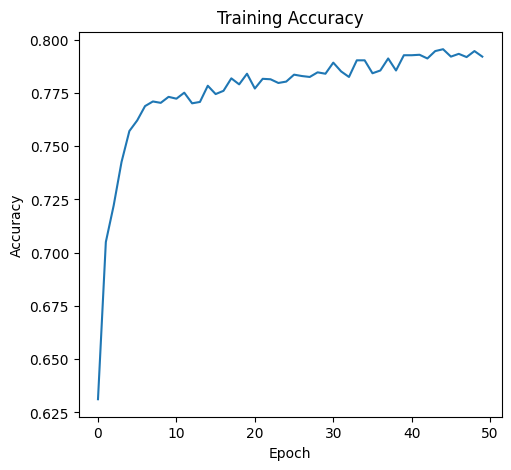

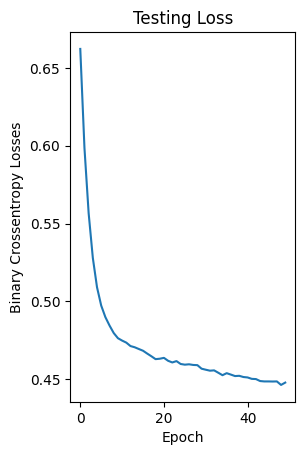

The selected Units are 128
The selected Learning Rate is 0.01
The selected Epoch value is 50
The selected Batch Value are 16
2 layers are considered with the same units and same activation function
Model: "sequential_109"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_330 (Dense)           (None, 128)               2048      
                                                                 
 dense_331 (Dense)           (None, 128)               16512     
                                                                 
 dense_332 (Dense)           (None, 1)                 129       
                                                                 
Total params: 18689 (73.00 KB)
Trainable params: 18689 (73.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

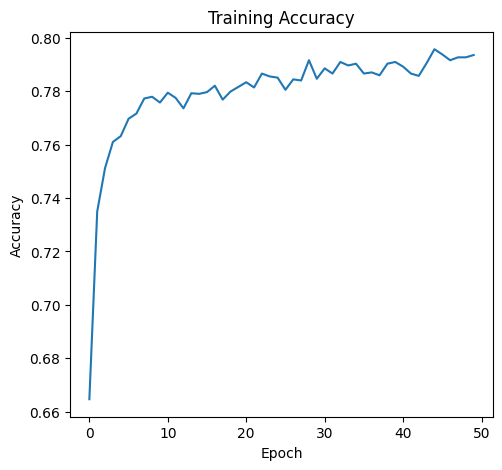

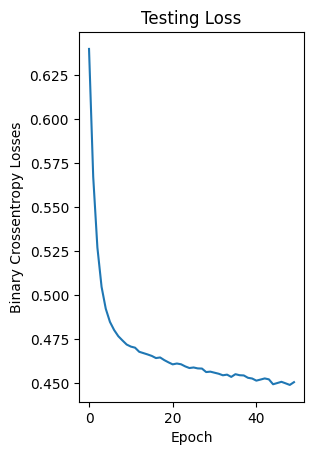

The selected Units are 64
The selected Learning Rate is 0.01
The selected Epoch value is 50
The selected Batch Value are 32
2 layers are considered with the same units and same activation function
Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_333 (Dense)           (None, 64)                1024      
                                                                 
 dense_334 (Dense)           (None, 64)                4160      
                                                                 
 dense_335 (Dense)           (None, 1)                 65        
                                                                 
Total params: 5249 (20.50 KB)
Trainable params: 5249 (20.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

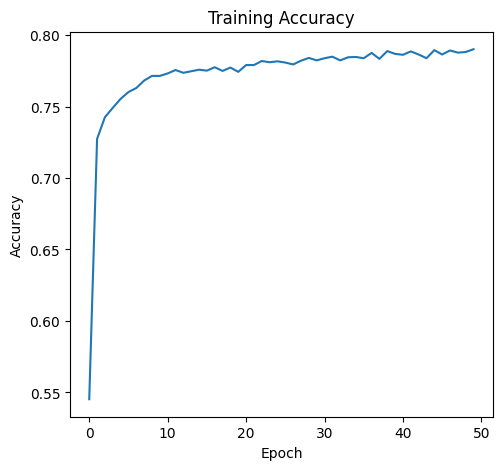

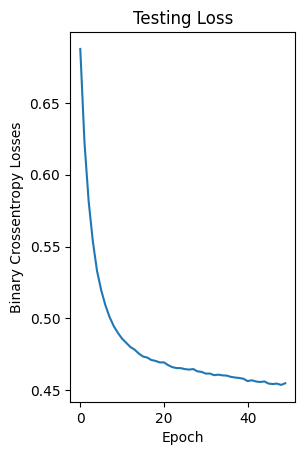

The selected Units are 128
The selected Learning Rate is 1e-05
The selected Epoch value is 60
The selected Batch Value are 25
2 layers are considered with the same units and same activation function
A 3rd layer is also added Now with the same units and same activation function
 
Model: "sequential_111"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_336 (Dense)           (None, 128)               2048      
                                                                 
 dense_337 (Dense)           (None, 128)               16512     
                                                                 
 dense_338 (Dense)           (None, 128)               16512     
                                                                 
 dense_339 (Dense)           (None, 1)                 129       
                                                                 
Total params: 35201 (137.50 KB)
Trai

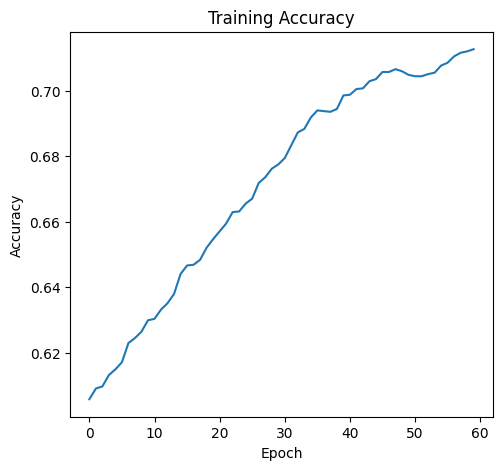

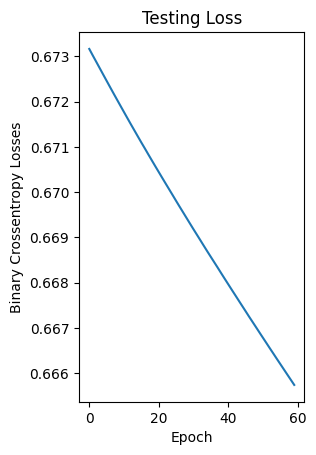

The selected Units are 128
The selected Learning Rate is 1e-05
The selected Epoch value is 60
The selected Batch Value are 25
2 layers are considered with the same units and same activation function
Model: "sequential_112"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_340 (Dense)           (None, 128)               2048      
                                                                 
 dense_341 (Dense)           (None, 128)               16512     
                                                                 
 dense_342 (Dense)           (None, 1)                 129       
                                                                 
Total params: 18689 (73.00 KB)
Trainable params: 18689 (73.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

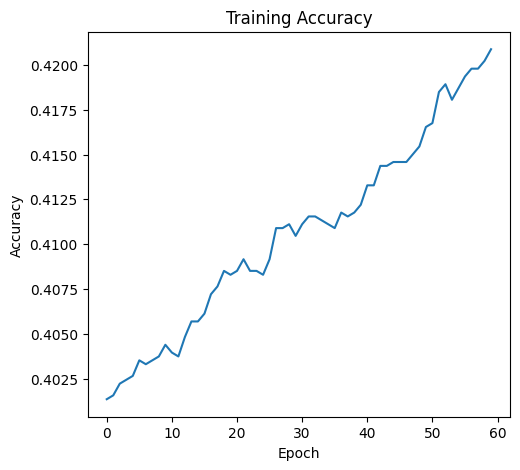

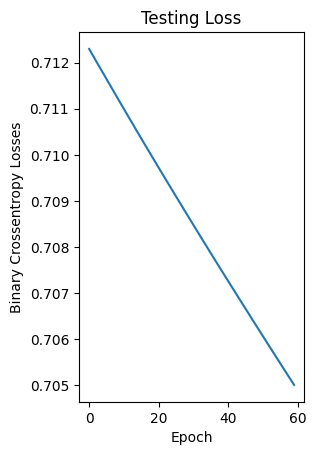

The selected Units are 64
The selected Learning Rate is 0.0001
The selected Epoch value is 70
The selected Batch Value are 40
2 layers are considered with the same units and same activation function
Model: "sequential_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_343 (Dense)           (None, 64)                1024      
                                                                 
 dense_344 (Dense)           (None, 64)                4160      
                                                                 
 dense_345 (Dense)           (None, 1)                 65        
                                                                 
Total params: 5249 (20.50 KB)
Trainable params: 5249 (20.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*

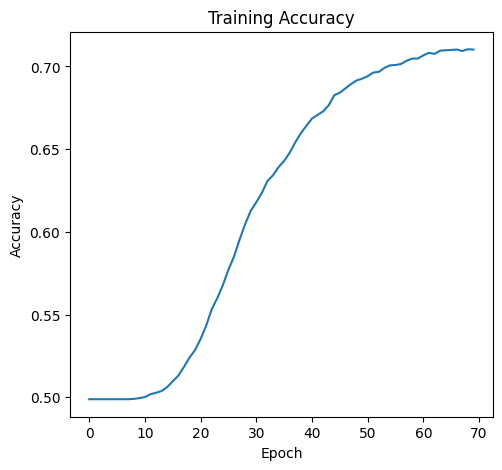

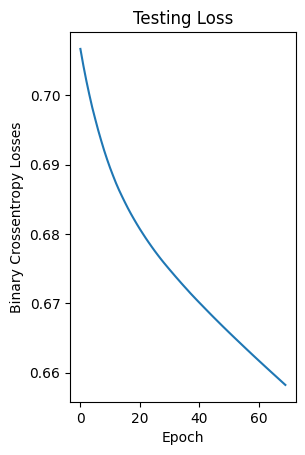

The selected Units are 32
The selected Learning Rate is 0.05
The selected Epoch value is 80
The selected Batch Value are 70
2 layers are considered with the same units and same activation function
Model: "sequential_114"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_346 (Dense)           (None, 32)                512       
                                                                 
 dense_347 (Dense)           (None, 32)                1056      
                                                                 
 dense_348 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1601 (6.25 KB)
Trainable params: 1601 (6.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

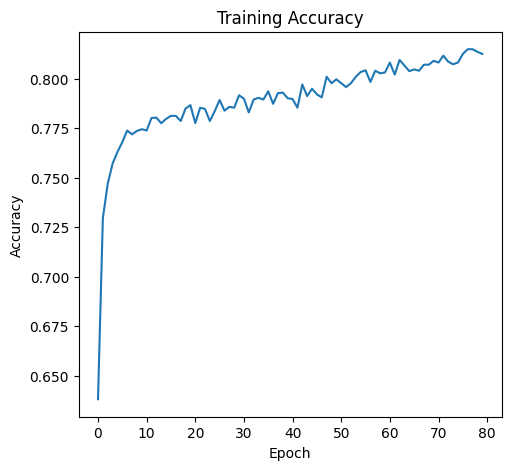

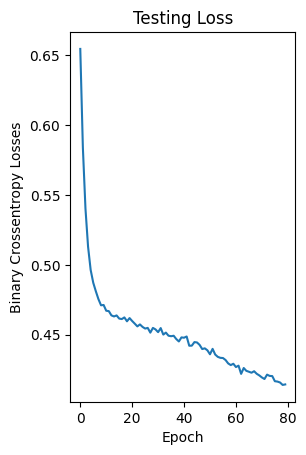

The selected Units are 64
The selected Learning Rate is 0.1
The selected Epoch value is 400
The selected Batch Value are 64
2 layers are considered with the same units and same activation function
Model: "sequential_115"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_349 (Dense)           (None, 64)                1024      
                                                                 
 dense_350 (Dense)           (None, 64)                4160      
                                                                 
 dense_351 (Dense)           (None, 1)                 65        
                                                                 
Total params: 5249 (20.50 KB)
Trainable params: 5249 (20.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

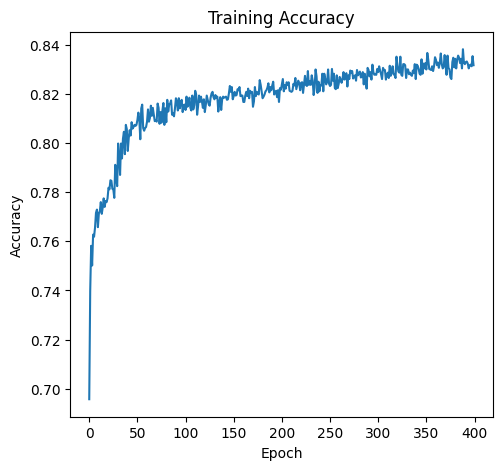

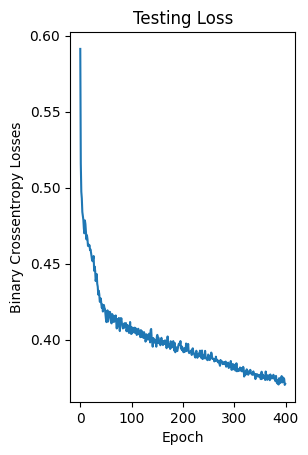

In [ ]:
units_val = [64, 128, 64, 128, 128, 64, 32, 64]
lr1=[0.01, 0.01, 0.01, 0.00001, 0.00001, 0.0001, 0.05, 0.1]
epoch=[50, 50, 50, 60, 60, 70, 80, 400]
batch=[16, 16, 32, 25, 25, 40, 70, 64]
thirdlayer = [False, False, False, True, False, False, False, False]
for i in range(len(lr1)):
  print(f"The selected Units are {units_val[i]}")
  print(f"The selected Learning Rate is {lr1[i]}")
  print(f"The selected Epoch value is {epoch[i]}")
  print(f"The selected Batch Value are {batch[i]}")
  print(f"2 layers are considered with the same units and same activation function")
  if thirdlayer[i]:
    print(f"A 3rd layer is also added Now with the same units and same activation function")
    print(" ")
  models(units_val[i], x_train, y_train, x_val, y_val,batch[i], epoch[i], lr1[i], thirdlayer[i])

# **My Analysis and final findings**

In [ ]:
'''
After considering the different combinations of layers, epochs, learning rates, units and batches
I felt that at the learning rates between the range [0.1, 0.01] the behavior of the model is better and giving good accuracy
values and low loss values.
If we add more than 2 layers, i.e., 3, we are getting poor performances, so did not tested more of that cases.

Hence, I have considered 64 units, 0.1 learning rate, 64 batches, and 400 epochs with 2 layers as my final
model parameters where I have received the best accuracy.
'''

# **Final Model with my above selected combination to run the testing**

In [ ]:
def models_final(units_val, x_test, y_test, batch, epoch, lr1):
    #Step1:
    model = Sequential()
    input_shape = x_test.shape[1]
    model.add(Dense(input_dim = input_shape, units = units_val, activation='tanh'))
    model.add(Dense(units = units_val, activation='tanh'))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.summary()

    #Step2:
    optimize = SGD(learning_rate = lr1)
    model.compile(optimizer=optimize, loss='binary_crossentropy', metrics=['accuracy'])

    #Step3:
    history = model.fit(x_test, y_test, batch_size=batch, epochs=epoch, verbose = 0)
    print("-*-"*65)

    #Step4:
    test_scores = model.evaluate(x_test, y_test)
    print("Testing Loss:", test_scores[0])
    print("Testing Accuracy:", test_scores[1])
    print("-*-"*65)

    plt.figure(figsize=[12,5])
    accuracy_curve = np.array(history.history['accuracy'])
    loss_curve = np.array(history.history['loss'])
    plot_curves(accuracy_curve, loss_curve, name = "Testing")

# **Testing with the Testing Dataset**

The selected Units are 64
The selected Learning Rate is 0.1
The selected Epoch value is 400
The selected Batch Value are 64
2 layers are considered with the same units and same activation function
Model: "sequential_117"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_355 (Dense)           (None, 64)                1024      
                                                                 
 dense_356 (Dense)           (None, 64)                4160      
                                                                 
 dense_357 (Dense)           (None, 1)                 65        
                                                                 
Total params: 5249 (20.50 KB)
Trainable params: 5249 (20.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

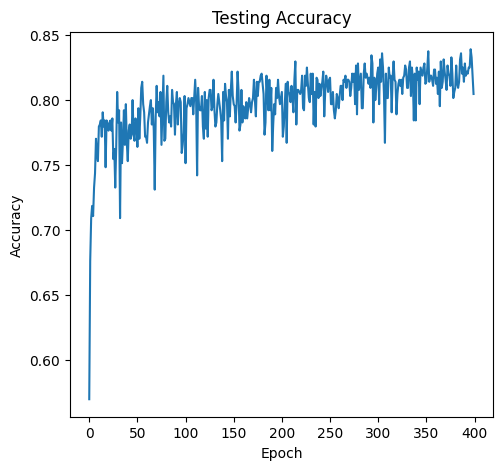

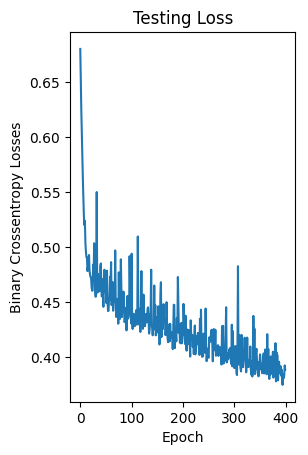

In [ ]:
#Testing the testing dataset with the above considered final parameters
lr1=0.1
units_val = 64
batch=64
epoch=400
print(f"The selected Units are {units_val}")
print(f"The selected Learning Rate is {lr1}")
print(f"The selected Epoch value is {epoch}")
print(f"The selected Batch Value are {batch}")
print(f"2 layers are considered with the same units and same activation function")
models_final(units_val, x_test, y_test, batch, epoch, lr1)

# **So based on the above testing dataset, we have received a Testing Loss as 0.3756 and Testing Accuracy: 0.8247**

In [ ]:
#Completed.
# Below code will help me in downloading the code file with graphs as PDF properly.
#Referred from youtube link: https://www.youtube.com/watch?v=-Ti9Mm21uVc

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!jupyter nbconvert --to pdf /content/Assignment9_CAP6619_SubashGuptaKaramsetty_Z23689645.ipynb

[NbConvertApp] Converting notebook /content/Assignment9_CAP6619_SubashGuptaKaramsetty_Z23689645.ipynb to pdf
[NbConvertApp] Support files will be in Assignment9_CAP6619_SubashGuptaKaramsetty_Z23689645_files/
[NbConvertApp] Making directory ./Assignment9_CAP6619_SubashGuptaKaramsetty_Z23689645_files
[NbConvertApp] Making directory ./Assignment9_CAP6619_SubashGuptaKaramsetty_Z23689645_files
[NbConvertApp] Making directory ./Assignment9_CAP6619_SubashGuptaKaramsetty_Z23689645_files
[NbConvertApp] Making directory ./Assignment9_CAP6619_SubashGuptaKaramsetty_Z23689645_files
[NbConvertApp] Making directory ./Assignment9_CAP6619_SubashGuptaKaramsetty_Z23689645_files
[NbConvertApp] Making directory ./Assignment9_CAP6619_SubashGuptaKaramsetty_Z23689645_files
[NbConvertApp] Making directory ./Assignment9_CAP6619_SubashGuptaKaramsetty_Z23689645_files
[NbConvertApp] Making directory ./Assignment9_CAP6619_SubashGuptaKaramsetty_Z23689645_files
[NbConvertApp] Making directory ./Assignment9_CAP6619_Su